### 1. 필요 라이브러리 & 파일 로드

In [65]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from mplsoccer import Pitch

In [90]:
with open(r"C:\krpython\adios-video\adios-video\track-stub\tracks_name+ba.pkl", 'rb') as f:
    data = pickle.load(f)

data

{'players': [{'OJY': {'bbox': [848.6761474609375,
     254.64996337890625,
     999.746337890625,
     504.15142822265625],
    'coord_frame': [924, 504],
    'coord_tr': [368, 212],
    'pitch_side': 'left',
    'team': 1,
    'team_color': [230, 61, 37],
    'kr_name': '오지영',
    'has_ball': True},
   'SMJ': {'bbox': [279.89532470703125,
     97.88803100585938,
     357.4841613769531,
     327.8619384765625],
    'coord_frame': [318, 327],
    'coord_tr': [191, 354],
    'pitch_side': 'left',
    'team': 1,
    'team_color': [230, 61, 37],
    'kr_name': '손명준'},
   'KSW': {'bbox': [483.9554443359375,
     90.24281311035156,
     542.66552734375,
     220.71971130371094],
    'coord_frame': [513, 220],
    'coord_tr': [62, 204],
    'pitch_side': 'left',
    'team': 1,
    'team_color': [230, 61, 37],
    'kr_name': '김성욱'},
   'SDG': {'bbox': [895.4559326171875,
     161.56658935546875,
     974.5980224609375,
     312.1477966308594],
    'coord_frame': [935, 312],
    'coord_tr': [23

In [91]:
player_data = []

# 리스트의 각 요소를 순회
for frame in data['players']:
    for player_id, player_info in frame.items():
        row = {
            'player_id': player_id,
            'team': player_info.get('team', None),
            'bbox': player_info.get('bbox', None),
            'team_color': player_info.get('team_color', None),
            'has_ball': player_info.get('has_ball', False),
            'kr_name': player_info.get('kr_name', None)
        }
        player_data.append(row)

player_data = pd.DataFrame(player_data)
player_data

,player_id,team,bbox,team_color,has_ball,kr_name
0,OJY,1,"[848.6761474609375, 254.64996337890625, 999.74...","[230, 61, 37]",True,오지영
1,SMJ,1,"[279.89532470703125, 97.88803100585938, 357.48...","[230, 61, 37]",False,손명준
2,KSW,1,"[483.9554443359375, 90.24281311035156, 542.665...","[230, 61, 37]",False,김성욱
3,SDG,1,"[895.4559326171875, 161.56658935546875, 974.59...","[230, 61, 37]",False,신대근
4,SHW,0,"[326.3047180175781, 235.0894012451172, 406.512...","[38, 110, 219]",False,서한울
...,...,...,...,...,...,...
9627,SMJ,1,"[560.6193237304688, 182.53929138183594, 627.53...","[230, 61, 37]",False,손명준
9628,KYS,0,"[690.8126831054688, 136.45167541503906, 746.68...","[38, 110, 219]",False,가윤성
9629,OJY,1,"[23.902244567871094, 237.2779998779297, 124.41...","[230, 61, 37]",False,오지영
9630,SDG,1,"[380.78607177734375, 189.53880310058594, 441.5...","[230, 61, 37]",False,신대근


In [92]:
#player_data[['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2']] = pd.DataFrame(player_data['bbox'].tolist(), index = player_data.index)
#player_data.head()


bbox_data = player_data['bbox'].apply(lambda x: pd.Series(x) if x is not None else pd.Series([None, None, None, None]))
bbox_data.columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2']

In [93]:
player_data = pd.concat([player_data, bbox_data], axis=1)
player_data

,player_id,team,bbox,team_color,has_ball,kr_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,OJY,1,"[848.6761474609375, 254.64996337890625, 999.74...","[230, 61, 37]",True,오지영,848.676147,254.649963,999.746338,504.151428
1,SMJ,1,"[279.89532470703125, 97.88803100585938, 357.48...","[230, 61, 37]",False,손명준,279.895325,97.888031,357.484161,327.861938
2,KSW,1,"[483.9554443359375, 90.24281311035156, 542.665...","[230, 61, 37]",False,김성욱,483.955444,90.242813,542.665527,220.719711
3,SDG,1,"[895.4559326171875, 161.56658935546875, 974.59...","[230, 61, 37]",False,신대근,895.455933,161.566589,974.598022,312.147797
4,SHW,0,"[326.3047180175781, 235.0894012451172, 406.512...","[38, 110, 219]",False,서한울,326.304718,235.089401,406.512360,451.280579
...,...,...,...,...,...,...,...,...,...,...
9627,SMJ,1,"[560.6193237304688, 182.53929138183594, 627.53...","[230, 61, 37]",False,손명준,560.619324,182.539291,627.530457,343.382141
9628,KYS,0,"[690.8126831054688, 136.45167541503906, 746.68...","[38, 110, 219]",False,가윤성,690.812683,136.451675,746.687439,269.790375
9629,OJY,1,"[23.902244567871094, 237.2779998779297, 124.41...","[230, 61, 37]",False,오지영,23.902245,237.278000,124.417290,404.449188
9630,SDG,1,"[380.78607177734375, 189.53880310058594, 441.5...","[230, 61, 37]",False,신대근,380.786072,189.538803,441.598999,370.852539


In [94]:
player_data.drop(['bbox', 'team_color'], axis=1, inplace=True)
player_data

,player_id,team,has_ball,kr_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,OJY,1,True,오지영,848.676147,254.649963,999.746338,504.151428
1,SMJ,1,False,손명준,279.895325,97.888031,357.484161,327.861938
2,KSW,1,False,김성욱,483.955444,90.242813,542.665527,220.719711
3,SDG,1,False,신대근,895.455933,161.566589,974.598022,312.147797
4,SHW,0,False,서한울,326.304718,235.089401,406.512360,451.280579
...,...,...,...,...,...,...,...,...
9627,SMJ,1,False,손명준,560.619324,182.539291,627.530457,343.382141
9628,KYS,0,False,가윤성,690.812683,136.451675,746.687439,269.790375
9629,OJY,1,False,오지영,23.902245,237.278000,124.417290,404.449188
9630,SDG,1,False,신대근,380.786072,189.538803,441.598999,370.852539


In [95]:
player_data.to_csv(r"C:\krpython\adios-video\adios-video\Kyungran\player_data.csv")

### 2. 팀 분리

In [71]:
team_a = player_data[player_data['team']==1]
team_b = player_data[player_data['team']==0]
team_b

,player_id,team,bbox,team_color,has_ball,kr_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2
4,SHW,0,"[326.3047180175781, 235.0894012451172, 406.512...","[38, 110, 219]",False,서한울,326.304718,235.089401,406.512360,451.280579
5,KSI,0,"[419.27960205078125, 190.1636962890625, 479.03...","[38, 110, 219]",False,김성일,419.279602,190.163696,479.031525,339.464722
6,KDW,0,"[765.1719360351562, 176.12887573242188, 819.33...","[38, 110, 219]",False,강동욱,765.171936,176.128876,819.339722,367.961670
7,KYS,0,"[654.85302734375, 135.2354736328125, 705.30828...","[38, 110, 219]",False,가윤성,654.853027,135.235474,705.308289,264.722778
12,SHW,0,"[327.6216125488281, 233.6412811279297, 408.161...","[38, 110, 219]",False,서한울,327.621613,233.641281,408.161102,450.900421
...,...,...,...,...,...,...,...,...,...,...
9623,KSI,0,"[419.9202575683594, 174.0684356689453, 465.291...","[38, 110, 219]",False,김성일,419.920258,174.068436,465.291351,298.434845
9625,KDW,0,"[868.94140625, 193.5404510498047, 970.61096191...","[38, 110, 219]",True,강동욱,868.941406,193.540451,970.610962,434.686188
9626,SHW,0,"[641.6731567382812, 172.77903747558594, 691.33...","[38, 110, 219]",False,서한울,641.673157,172.779037,691.331665,325.950836
9628,KYS,0,"[690.8126831054688, 136.45167541503906, 746.68...","[38, 110, 219]",False,가윤성,690.812683,136.451675,746.687439,269.790375


In [72]:
# 팀 파일 저장
player_data = player_data.drop(['bbox', 'team_color'], axis=1)
player_data

,player_id,team,has_ball,kr_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,OJY,1,True,오지영,848.676147,254.649963,999.746338,504.151428
1,SMJ,1,False,손명준,279.895325,97.888031,357.484161,327.861938
2,KSW,1,False,김성욱,483.955444,90.242813,542.665527,220.719711
3,SDG,1,False,신대근,895.455933,161.566589,974.598022,312.147797
4,SHW,0,False,서한울,326.304718,235.089401,406.512360,451.280579
...,...,...,...,...,...,...,...,...
9627,SMJ,1,False,손명준,560.619324,182.539291,627.530457,343.382141
9628,KYS,0,False,가윤성,690.812683,136.451675,746.687439,269.790375
9629,OJY,1,False,오지영,23.902245,237.278000,124.417290,404.449188
9630,SDG,1,False,신대근,380.786072,189.538803,441.598999,370.852539


In [73]:
player_data.to_csv(r"C:\krpython\adios-video\Kyungran\player_data.csv")

### 3. 유동히트맵 그리기

In [74]:
player_data = pd.read_csv(r"C:\krpython\adios-video\Kyungran\player_data.csv", index_col=0)
player_data.head()

,player_id,team,has_ball,kr_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,OJY,1,True,오지영,848.676147,254.649963,999.746338,504.151428
1,SMJ,1,False,손명준,279.895325,97.888031,357.484161,327.861938
2,KSW,1,False,김성욱,483.955444,90.242813,542.665527,220.719711
3,SDG,1,False,신대근,895.455933,161.566589,974.598022,312.147797
4,SHW,0,False,서한울,326.304718,235.089401,406.512360,451.280579


In [75]:
# 중심좌표 계산
player_data['center_x'] = (player_data['bbox_x1'] + player_data['bbox_x2']) / 2
player_data['center_y'] = (player_data['bbox_y1'] + player_data['bbox_y2']) / 2

In [76]:
# min-max scale
mmscaler = MinMaxScaler()
player_data['center_x'] = mmscaler.fit_transform(player_data['center_x'].values.reshape(-1, 1))*200
player_data['center_y'] = mmscaler.fit_transform(player_data['center_y'].values.reshape(-1, 1))*100

In [77]:
player_data

,player_id,team,has_ball,kr_name,bbox_x1,bbox_y1,bbox_x2,bbox_y2,center_x,center_y
0,OJY,1,True,오지영,848.676147,254.649963,999.746338,504.151428,146.980293,53.371896
1,SMJ,1,False,손명준,279.895325,97.888031,357.484161,327.861938,48.107141,16.944230
2,KSW,1,False,김성욱,483.955444,90.242813,542.665527,220.719711,79.885974,4.389295
3,SDG,1,False,신대근,895.455933,161.566589,974.598022,312.147797,148.746351,22.190362
4,SHW,0,False,서한울,326.304718,235.089401,406.512360,451.280579,55.898950,45.449674
...,...,...,...,...,...,...,...,...,...,...
9627,SMJ,1,False,손명준,560.619324,182.539291,627.530457,343.382141,93.073666,27.900534
9628,KYS,0,False,가윤성,690.812683,136.451675,746.687439,269.790375,113.431370,14.810541
9629,OJY,1,False,오지영,23.902245,237.278000,124.417290,404.449188,8.178832,40.566847
9630,SDG,1,False,신대근,380.786072,189.538803,441.598999,370.852539,63.211547,31.670698


In [78]:
# 팀 분리
team_a = player_data[player_data['team']==0]
team_b = player_data[player_data['team']==1]

- team_a 시각화

Text(0.5, 1.0, 'team_a')

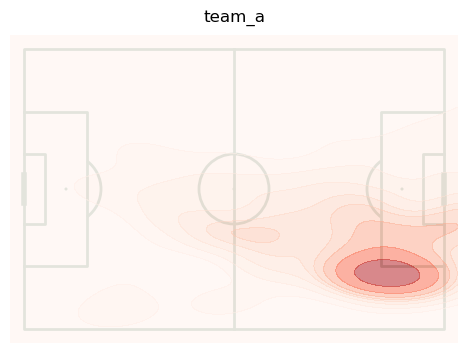

In [79]:
# 시각화
fig, ax = plt.subplots(figsize=(7,4))
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='#c7d5cc') #선 색깔

pitch.draw(ax=ax)

# KDE 히트맵 생성
sns.kdeplot(
    x=team_a["center_x"],
    y=team_a["center_y"],
    fill=True,
    thresh=0,
    levels=10,
    cmap="Reds",
    alpha=0.5,
    ax=ax  # KDE 플롯을 동일한 축에 그리기 위해 ax=ax 사용
)

# y축 반전
plt.gca().invert_yaxis()

plt.title('team_a', pad=10)


- team_b 시각화

Text(0.5, 1.0, 'team_b')

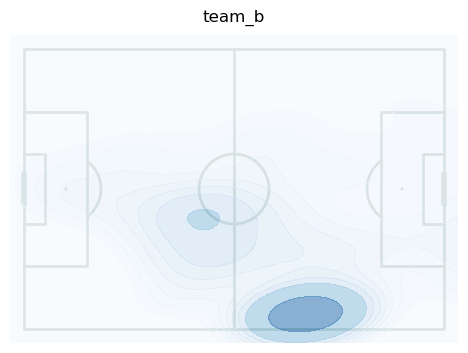

In [80]:
# 시각화
fig, ax = plt.subplots(figsize=(7,4))
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='#c7d5cc') #선 색깔

pitch.draw(ax=ax)

# KDE 히트맵 생성
sns.kdeplot(
    x=team_b["center_x"],
    y=team_b["center_y"],
    fill=True,
    thresh=0,
    levels=10,
    cmap="Blues",
    alpha=0.5,
    ax=ax  # KDE 플롯을 동일한 축에 그리기 위해 ax=ax 사용
)

# y축 반전
plt.gca().invert_yaxis()

plt.title('team_b', pad=10)
